# 1

In [54]:
import pandas as pd

In [55]:
fake_news = pd.read_csv("fakeNews.csv")
true_news = pd.read_csv("trueNews.csv")


# 2

In [56]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
import re

In [57]:
def remove_hashtags(text):
    text = re.sub(r'#','',text)
    return text

In [58]:
def remove_small_words(text):
    words = text.split()
    words = [word for word in words if len(word) >= 2]
    return ' '.join(words)

In [59]:
def remove_punctuation(text):
    tokenized_text = tokenizer.tokenize(text)
    return ' '.join(tokenized_text)

In [60]:
def lem(text):
    lemmatized_text = lemmatizer.lemmatize(text)
    return lemmatized_text

In [61]:
fake_news['cleaned'] = fake_news['Text'].apply(remove_hashtags)\
    .apply(remove_small_words)\
    .apply(remove_punctuation)\
    .apply(lem)

In [62]:
true_news['cleaned'] = true_news['Text'].apply(remove_hashtags)\
    .apply(remove_small_words)\
    .apply(remove_punctuation)\
    .apply(lem)

# 3

In [63]:
fake_news['label'] = 'fake'
true_news['label'] = 'true'

In [64]:
all_news = pd.concat([fake_news,true_news])
just_variables = pd.concat([fake_news[['label','cleaned']],true_news[['label','cleaned']]])

In [65]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
x = just_variables['cleaned']
y = just_variables['label']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [68]:
tfidf = TfidfVectorizer(stop_words='english',max_features=5000)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

# 4

In [69]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf,y_train)
y_pred = model.predict(x_test_tfidf)

In [70]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,pos_label='true')
recall = recall_score(y_test,y_pred,pos_label='true')
f1 = f1_score(y_test,y_pred,pos_label='true')

In [71]:
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')

Accuracy: 0.993
Precision: 0.997
Recall: 0.988
F1-score: 0.993


# 5

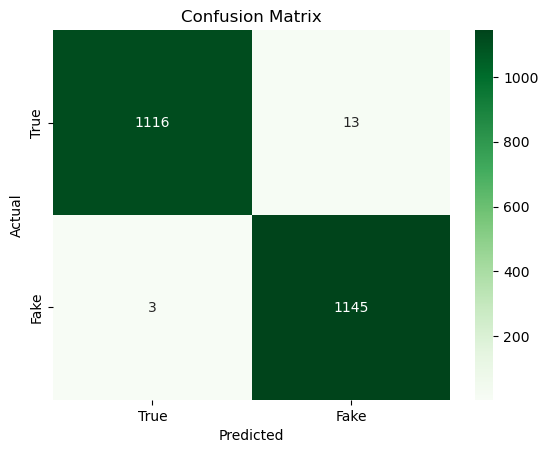

In [72]:
cm = confusion_matrix(y_test,y_pred,labels = ['true','fake'])
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens',xticklabels=['True','Fake'],yticklabels=['True','Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [73]:
misclassified_indices = [i for i in range(len(y_test)) if y_test.iloc[i] != y_pred[i]]
misclassified_samples = x_test.iloc[misclassified_indices]
misclassified_true_lables = y_test.iloc[misclassified_indices]
misclassified_pred_labels = y_pred[misclassified_indices]
print("Misclassified samples:")
for i in range(min(10, len(misclassified_samples))):
    print(f"Actual: {misclassified_true_lables.iloc[i]}, Predicted: {misclassified_pred_labels[i]}")
    print(f"Text: {misclassified_samples.iloc[i]}")

Misclassified samples:
Actual: true, Predicted: fake
Text: Just in Indian begins export of major farm products amid COVID 19 lockdown Govt PTI COVID19 lockdown
Actual: true, Predicted: fake
Text: Italian and South Korean nationals who are granted fresh visa issued after 05 03 2020 should carry Tested Negative for COVID 19 medical certificate from designated laboratories of Italy and South Korea
Actual: true, Predicted: fake
Text: Just in Goa Chief Minister Pramod Sawant says lockdown 4 0 will start from May 18 Even though Goa is COVID 19 free state it will follow this lockdown and Section 144 will continue till this lockdown is in force Centre will decide on the duration
Actual: fake, Predicted: true
Text: Doctors encouraged by hospitals and AMA to overcount COVID 19 deaths
Actual: fake, Predicted: true
Text: Omani princess Sayyida Mona bint Fahd al Said tweets against India
Actual: true, Predicted: fake
Text: Just In Gujarat adds 372 new COVID 19 cases and 20 deaths So far 980 people 

### Conclusion:
##### It appears that my model had more false negatives than false positives, since there were only 3 false positives to 13 false negatives. It had higher recall compared to precision, meaning that it did really well identifying true news posts, but it had more false negatives where it incorrectly labeled true news posts as fake. By looking at the misclassified posts, it appears that there were multiple news posts which began with "Just in" that were predicted to be fake but were actually true. This model could be improved by including bigrams or trigrams in the future. 